<a href="https://colab.research.google.com/github/nandu26m/data-analytics-projects/blob/main/airlines-data-analysis-project/Airline_Flight_Price_Prediction_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Part 1: Import Libraries & Load Data

In [15]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("airlines_flights_data.csv")

# Drop missing values
data.dropna(inplace=True)

# Standardize column names
data.columns = [col.strip().lower().replace(" ", "_") for col in data.columns]

### Part 2: Data Preprocessing

In [16]:
# Encode categorical columns
categorical_cols = ['airline', 'source_city', 'departure_time', 'stops',
                    'arrival_time', 'destination_city', 'class', 'flight']
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    le_dict[col] = le  # save encoder for later use

# Features and target
X = data.drop(columns=['price', 'index'])
y = data['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train/Test Shapes:", X_train.shape, X_test.shape)

Train/Test Shapes: (240122, 10) (60031, 10)


### Part 3: Train & Evaluate Random Forest

In [19]:
# Train model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Metrics:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

Random Forest Metrics:
MAE: 860.7787236191406
RMSE: 2312.7358035194575
R2 Score: 0.989623800524023


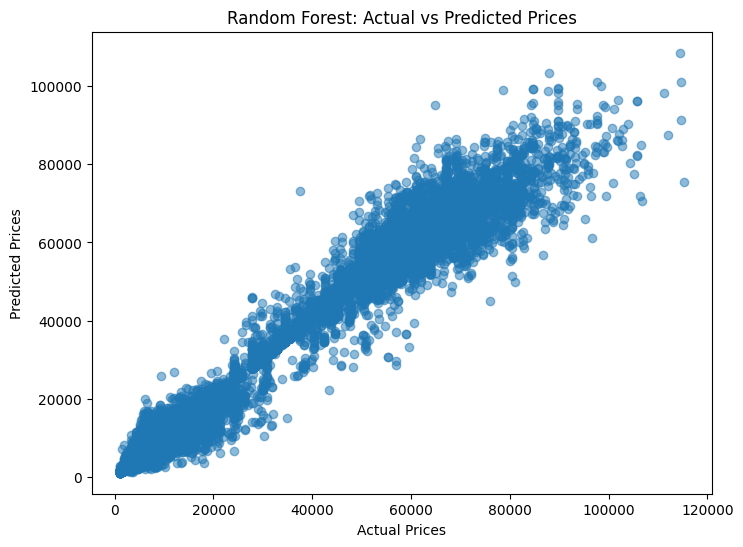

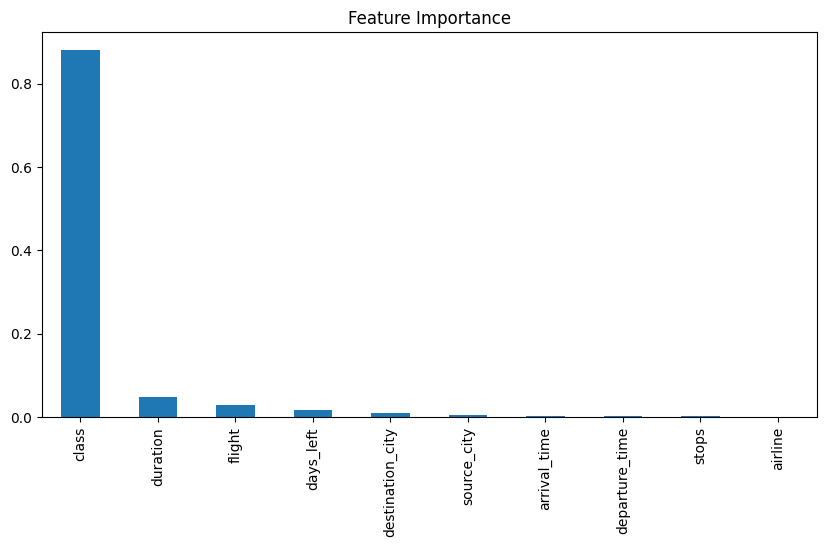

In [20]:
# Visualize predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Actual vs Predicted Prices")
plt.show()
print()

# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances.plot(kind='bar', figsize=(10,5), title="Feature Importance")
plt.show()

### Part 4: Use the Model for New Predictions

In [21]:
# Prepare new flight data (use same encoding as training)
new_data = pd.DataFrame({
    'airline': [4],
    'flight': [1408],
    'source_city': [2],
    'departure_time': [2],
    'stops': [2],
    'arrival_time': [5],
    'destination_city': [5],
    'class': [1],
    'duration': [2.17],
    'days_left': [1]
})

# Predict price
predicted_price = rf_model.predict(new_data)
print("Predicted Price:", predicted_price[0])

Predicted Price: 7949.325
